# Bases de datos utilizadas

<ul>
    <li>
       <a href=https://www.dane.gov.co/index.php/estadisticas-por-tema/comercio-internacional/exportaciones/exportaciones-historicos>Colombia, exportaciones totales según grupos de productos OMC a partir de la agregación CUCI Rev.3. 2010-2020p (junio) </a>
    </li>
    <li>
        <a href= href=https://www.dane.gov.co/index.php/estadisticas-por-tema/comercio-                        internacional/exportaciones/exportaciones-historicos> Colombia, principales destinos de las exportaciones. 2008p - 2020p (junio)</a>
    </li>
</ul>



## Importaciones de librerías 

In [327]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Carga de documentos

In [355]:
#Cargar datos sobre los productos
mainpath = "./datasets"
filename1 = "expo_productos.csv"
fullpath1 = os.path.join(mainpath, filename1)
#Cargar datos sobre los paises
filename2 = "expo_paises.csv"
fullpath2 = os.path.join(mainpath, filename2)

In [356]:
data1 = pd.read_csv(fullpath1,sep=";")
data2 = pd.read_csv(fullpath2,sep=";")

In [357]:
#Visualizo las columnas del dataset
data1.columns.values

array(['Year', 'Agropecuarios, alimentos y bebidas',
       'Combustibles y Prod de industrias extractivas', 'Manufacturas',
       'Otros sectores', 'Unnamed: 5'], dtype=object)

<h2>En este data set se presenta las ventas en miles de dolares de cada una de los grupos de los productos desde el año 2016-2019</h2>

In [358]:
data1

,Year,"Agropecuarios, alimentos y bebidas",Combustibles y Prod de industrias extractivas,Manufacturas,Otros sectores,Unnamed: 5
0,2016,6864748.0,15801567.0,7526108.0,1575917.0,NaN
1,2017,7355648.0,21171675.0,7709991.0,1784545.0,NaN
2,2018,7301253.0,24783269.0,8324362.0,1495893.0,NaN
3,2019,7362741.0,22011293.0,8290324.0,1824807.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
301,feb-20,NaN,681998.0,1509119.0,571646.0,180330.0
302,mar-20,NaN,640248.0,978526.0,625305.0,194956.0
303,abr-20,NaN,569284.0,721508.0,443733.0,129714.0
304,may-20,NaN,614096.0,953877.0,429897.0,223674.0


In [359]:
#Se escoge un subcojunto del dataset y se borra la columna que no tiene ningún contenido
expo_products = data1[0:4].dropna(axis=1, how="all")
expo_products

,Year,"Agropecuarios, alimentos y bebidas",Combustibles y Prod de industrias extractivas,Manufacturas,Otros sectores
0,2016,6864748.0,15801567.0,7526108.0,1575917.0
1,2017,7355648.0,21171675.0,7709991.0,1784545.0
2,2018,7301253.0,24783269.0,8324362.0,1495893.0
3,2019,7362741.0,22011293.0,8290324.0,1824807.0


## Análisis para los grupos de productos

In [360]:
#Revisamos los tipos de los datos para ver que no hayan tipos los cuales no dejen realizar algunos estadísticos
expo_products.dtypes

Year                                              object
Agropecuarios, alimentos y bebidas               float64
Combustibles y Prod de industrias extractivas    float64
Manufacturas                                     float64
Otros sectores                                   float64
dtype: object

In [361]:
#Revisamos los estadisticos básicos para cada grupo
expo_products.drop(labels="Year",axis=1).describe().round(decimals=2)

,"Agropecuarios, alimentos y bebidas",Combustibles y Prod de industrias extractivas,Manufacturas,Otros sectores
count,4.00,4.00,4.00,4.00
mean,7221097.50,20941951.00,7962696.25,1670290.50
std,239148.90,3758347.91,405220.64,159426.35
min,6864748.00,15801567.00,7526108.00,1495893.00
25%,7192126.75,19829148.00,7664020.25,1555911.00
50%,7328450.50,21591484.00,8000157.50,1680231.00
75%,7357421.25,22704287.00,8298833.50,1794610.50
max,7362741.00,24783269.00,8324362.00,1824807.00


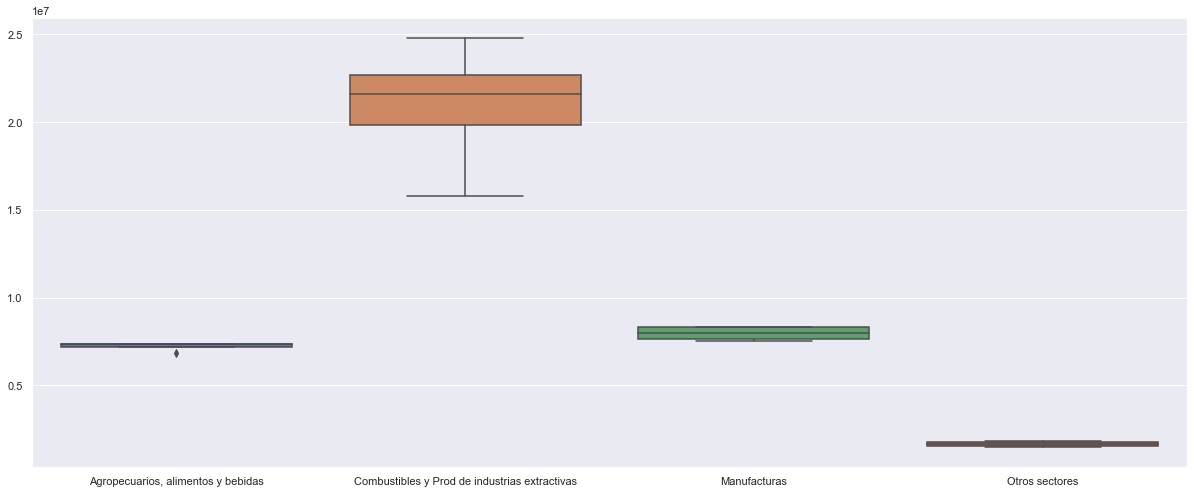

In [362]:
#Boxplot
sns.boxplot(data=expo_products.drop(labels="Year",axis=1))
sns.set(rc={'figure.figsize':(20.7, 8.27)})
plt.show()

In [363]:
expo_products.std().round(decimals=2)

Agropecuarios, alimentos y bebidas                239148.90
Combustibles y Prod de industrias extractivas    3758347.91
Manufacturas                                      405220.64
Otros sectores                                    159426.35
dtype: float64

<h3> ¿Cuál es el grupo de producto más estable? </h3>
<p> Observando las desviaciones estándar es posible determinar que el grupo que tiene menor desviación estándar es "Otros sectores". Esto ya da una intuición de que grupo de producto es el más estable, ahora bien, realizando boxplot es posible observar confirmar lo anterior. Si bien el grupo de "Combustibles y productos de industrias extractivas" es el más <strong> rentable </strong>, es el menos estable de los grupos y por lo tanto el más estable sería "Otros sectores". Ahora bien al hablar de "Otros sectores" hay que destacar que no se está hablando de un solo grupo como tal,si no de unos sectores los cuales no están representados indivudualmente, por lo tanto si se quiere escoger un grupo estable que esté dentro de los analizados podría ser "Agropecuarios, alimnentos y bebidas"</p>

<h2>En este data set se presenta las exportaciones en millones de dolares por pais, desde el año 2016-2019</h2>

In [364]:
data2.columns.values

array(['Year', 'Estados Unidos', 'Venezuela', 'Alemania', 'Ecuador',
       'Belgica', 'Peru', 'Japon', 'Mexico'], dtype=object)

In [365]:
data2

,Year,Estados Unidos,Venezuela,Alemania,Ecuador,Belgica,Peru,Japon,Mexico
0,2016,10286,614,476,1200,451,1051,428,937
1,2017,10615,319,473,1465,507,1138,557,1537
2,2018,10674,354,449,1852,404,1165,474,1638
3,2019,11520,196,483,1954,487,1146,466,1409


In [366]:
#Se escoge un subcojunto del dataset y se borra la columna que no tiene ningún contenido
expo_paises = data2.dropna(axis=1, how="all")
expo_paises

,Year,Estados Unidos,Venezuela,Alemania,Ecuador,Belgica,Peru,Japon,Mexico
0,2016,10286,614,476,1200,451,1051,428,937
1,2017,10615,319,473,1465,507,1138,557,1537
2,2018,10674,354,449,1852,404,1165,474,1638
3,2019,11520,196,483,1954,487,1146,466,1409


## Análisis para los principales paises destino


In [367]:
#Revisamos los tipos de los datos para ver que no hayan tipos los cuales no dejen realizar algunos estadísticos
expo_products.dtypes

Year                                              object
Agropecuarios, alimentos y bebidas               float64
Combustibles y Prod de industrias extractivas    float64
Manufacturas                                     float64
Otros sectores                                   float64
dtype: object

In [387]:
#Revisamos los estadisticos básicos para cada grupo
expo_paises.drop(labels="Year",axis=1).describe().round(decimals=2)

,Estados Unidos,Venezuela,Alemania,Ecuador,Belgica,Peru,Japon,Mexico
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,10773.75,370.75,470.25,1617.75,462.25,1125.00,481.25,1380.25
std,525.97,175.75,14.77,349.18,45.22,50.62,54.34,310.00
min,10286.00,196.00,449.00,1200.00,404.00,1051.00,428.00,937.00
25%,10532.75,288.25,467.00,1398.75,439.25,1116.25,456.50,1291.00
50%,10644.50,336.50,474.50,1658.50,469.00,1142.00,470.00,1473.00
75%,10885.50,419.00,477.75,1877.50,492.00,1150.75,494.75,1562.25
max,11520.00,614.00,483.00,1954.00,507.00,1165.00,557.00,1638.00


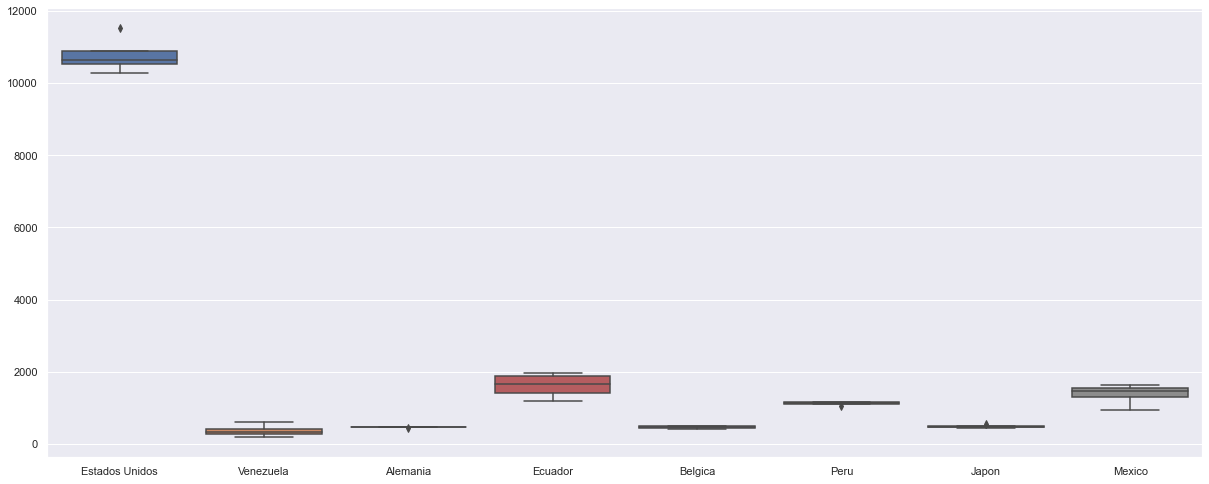

In [369]:
#Graficando Boxplot
sns.boxplot(data=expo_paises.drop(labels="Year",axis=1).iloc[:,0:8])
plt.show()

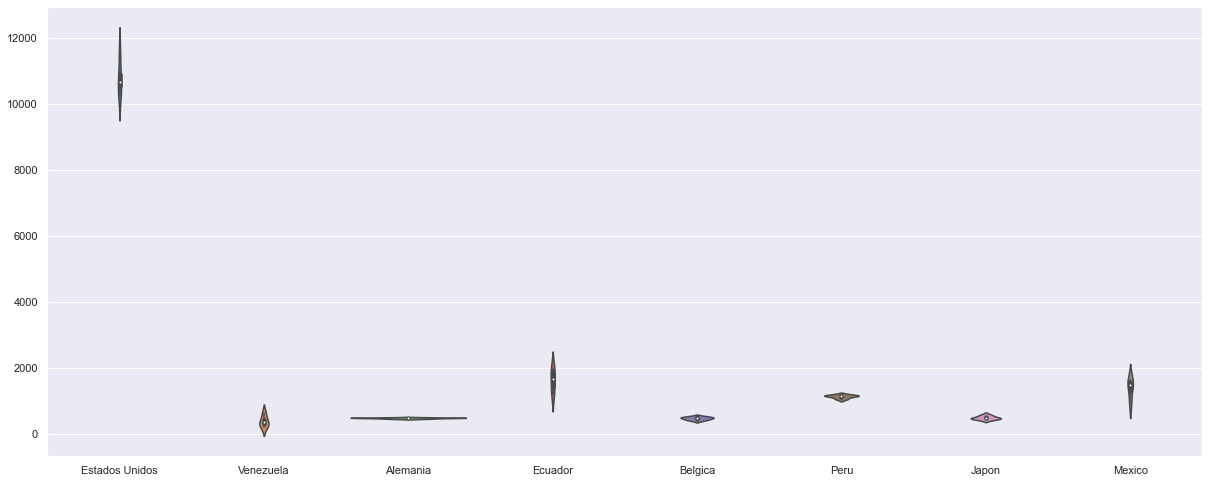

In [385]:
#Graficando Violinplot
sns.violinplot(data=expo_paises.drop(labels="Year",axis=1))
plt.show()

In [384]:
#Calculando las desviaciones estandar
expo_paises.drop(labels="Year",axis=1).std()

Estados Unidos    525.972354
Venezuela         175.752430
Alemania           14.773287
Ecuador           349.182259
Belgica            45.220755
Peru               50.616203
Japon              54.340746
Mexico            310.001478
dtype: float64

<h3> ¿Cuál es el país más estable? </h3>
<p> Observando el boxplot se podría decir que hay una especie de "empate" entre Alemania, Belgica, Perú y Japón, por lo tanto se realiza otro gráfico (en este caso el violinplot) para poder observar mejor la variación en los datos, aquí se puede observar que el quien tiene una menor variación es Alemania. Ahora, para asegurar esta idea se procede calcular las respectivas desviaciones estándar y gracias a eso posible confirmar que el país que tiene menor desviación estándar(menor variabilidad en sus datos) y por lo tanto el más estable en este análisis es Alemania </p>